In [76]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score, precision_recall_curve
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
data = pd.read_csv('train_hack.csv')

In [3]:
data.head(10)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.000000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.000000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.880000,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.000000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.000000,36,0
5,5959,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,THAILAND,25.000000,0.000000,38,0
6,6031,EPX,Travel Agency,Online,Cancellation Plan,215,UNITED KINGDOM,59.000000,0.000000,36,0
7,8394,JZI,Airlines,Online,Basic Plan,31,VIET NAM,22.000000,7.700000,43,0
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
categorical_col = data[['Agency','Agency Type','Product Name','Distribution Channel','Destination']]

In [7]:
le = LabelEncoder()

In [8]:
le_categorical_col = categorical_col.apply(le.fit_transform)

In [9]:
data = data.drop(['Agency','Agency Type','Destination','Product Name','Distribution Channel'],1)

In [10]:
data = data.join(le_categorical_col)

In [11]:
data.head()      

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Agency,Agency Type,Product Name,Distribution Channel,Destination
0,2010,61,12.0,0.00,41,0,7,1,10,1,68
1,4245,4,17.0,0.00,35,0,7,1,10,1,53
2,9251,26,19.8,11.88,47,0,6,1,16,1,84
3,4754,15,27.0,0.00,48,0,7,1,1,1,33
4,8840,15,37.0,0.00,36,0,7,1,1,1,53


In [12]:
X = data.drop(['ID','Claim','Agency Type','Distribution Channel'],1)
y = data['Claim']

In [13]:
X_train,X_test,y_train,y_test = tts(X,y,random_state=1, test_size=0.3)

In [35]:
print(y_test.shape)
print(X_test.shape)

(15693,)
(15693, 7)


In [16]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# # data_new = (data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
# # data_new
# d = pd.DataFrame(data>(Q3+1.5*IQR))
# d[d==True].sum()
# # print(data[data==True].sum())

In [17]:
# data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data.shape

In [34]:
data = data.drop_duplicates()
data.Duration.value_counts().sum()

52308

In [36]:
data.isnull().sum()

ID                      0
Duration                0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
Agency                  0
Agency Type             0
Product Name            0
Distribution Channel    0
Destination             0
dtype: int64

UNIVARIATE ANALYSIS

In [105]:
# data.Duration.plot(kind='bar')

In [37]:
data.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Agency,Agency Type,Product Name,Distribution Channel,Destination
count,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000,52308.000000
mean,6005.771832,58.251128,48.551390,12.219222,39.555976,0.166686,6.280244,0.669018,9.219680,0.982966,56.760094
std,2306.472522,109.132428,60.192944,22.846932,13.762664,0.372699,2.625819,0.470571,6.481485,0.129398,27.169789
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000,6.000000,0.000000,2.000000,1.000000,37.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000,7.000000,1.000000,10.000000,1.000000,68.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000,7.000000,1.000000,16.000000,1.000000,75.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000,15.000000,1.000000,24.000000,1.000000,96.000000


In [ ]:
# in above description we can see that the difference between 75% and max value is very high for DURATION, NET SALES COMMISION & AGE.
# this means our data has outliers for that columns.

In [69]:
# data[['Net Sales','Commision (in value)','Age']].plot(kind='hist',alpha=0.4, stacked=True, figsize=(16,6), color=['red','blue','green'])

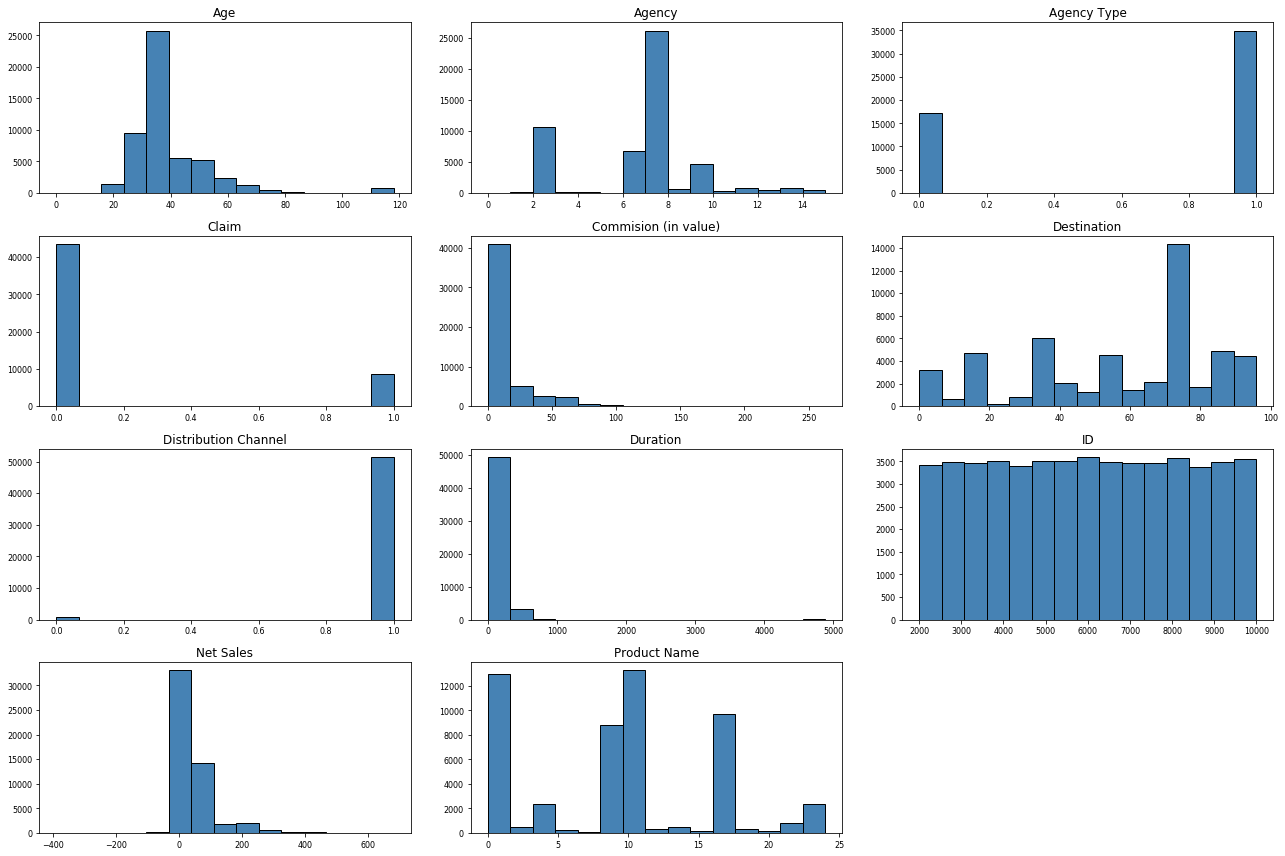

In [38]:
data.hist(bins=15, color='steelblue', edgecolor='black', 
           xlabelsize=8, ylabelsize=8, grid=False) 
plt.tight_layout(rect=(0, 0, 3.0, 3.0)) 

In [ ]:
### box plot function for single column boxplots...

# def boxplot (dataframe, column):
#     plt.figure(figsize=(13, 6))
#     sns.boxplot(dataframe[column], orient='v')
#     return boxplot

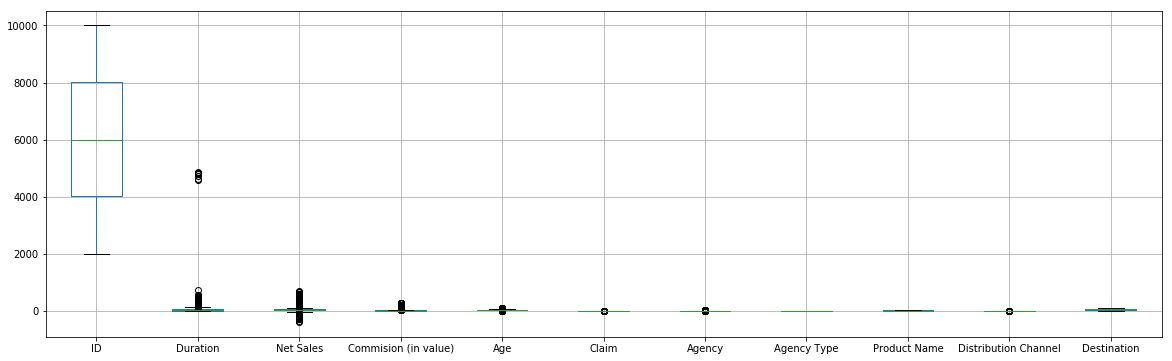

In [39]:
data.boxplot(figsize=(20,6))

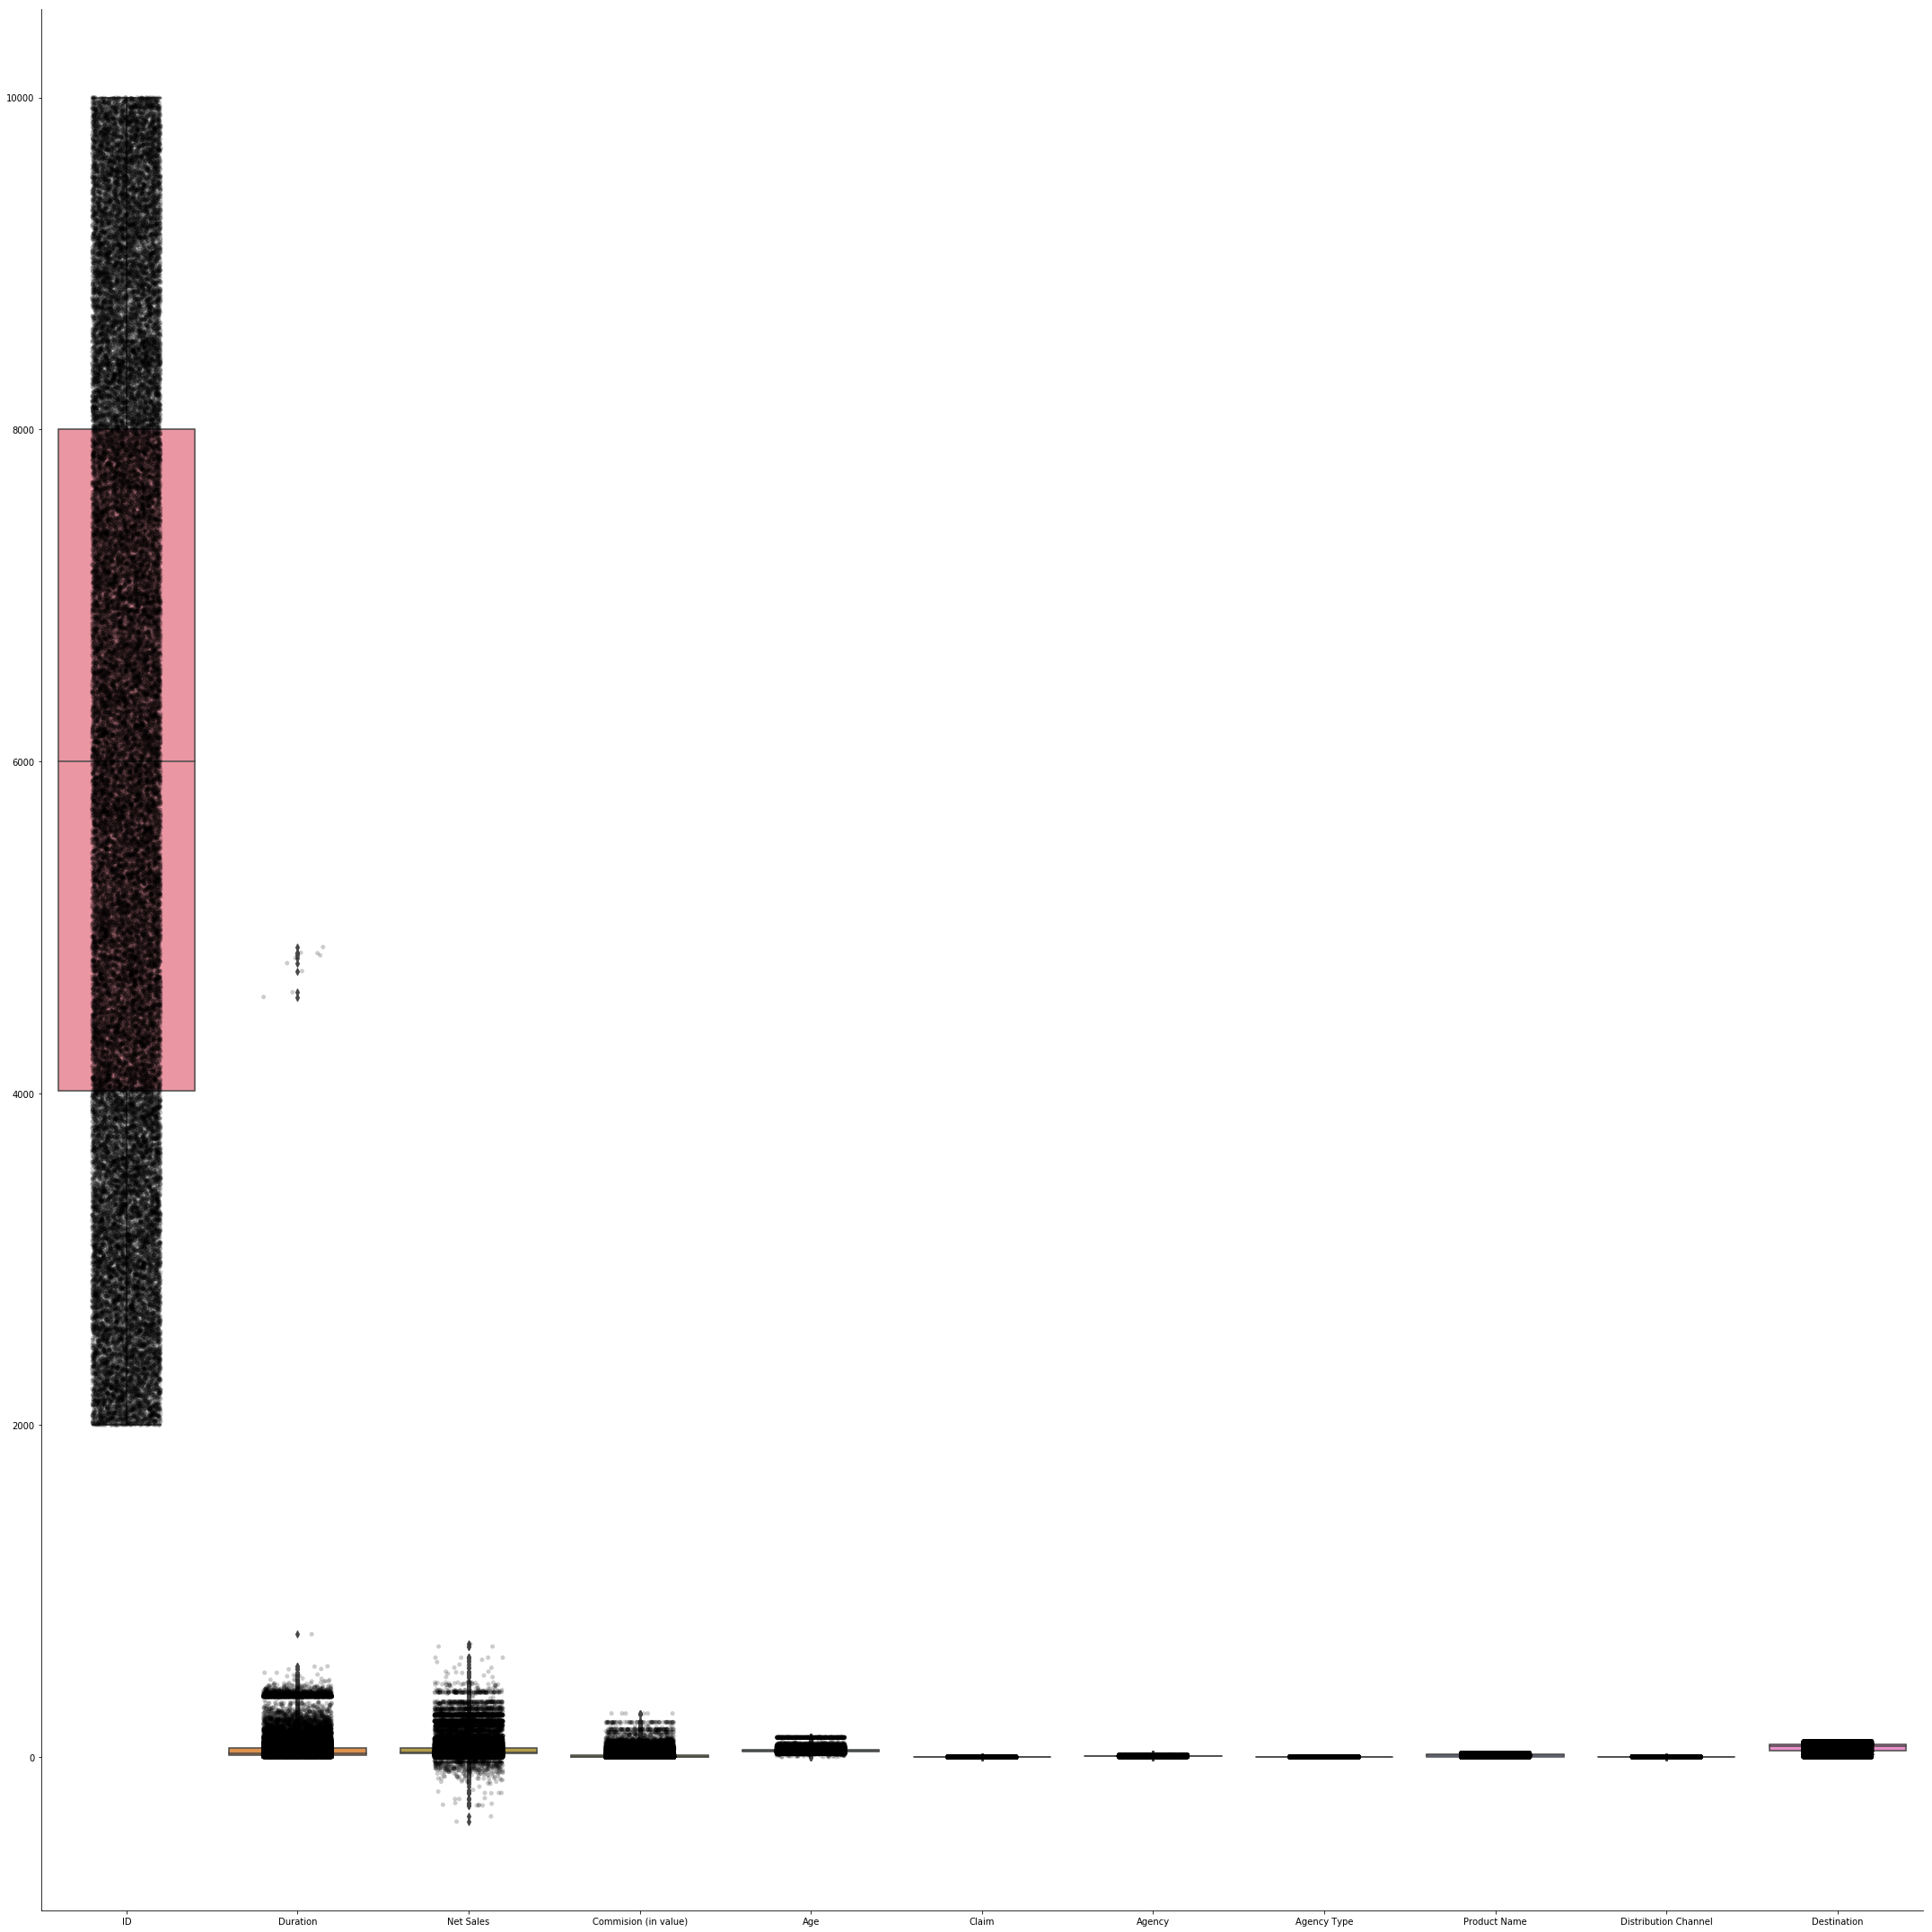

In [40]:
sns.catplot(kind="box",  data=data, height=30, aspect=1.0 )
# add data points to boxplot with stripplot
sns.stripplot(data=data,alpha=0.2, jitter=0.2,color='k', size=5)

# I have used stripplot(categorical scatterplot) and boxplot to understand the spread of data 

In [41]:
def distplot (dataframe, column):
    plt.figure(figsize=(20, 6))
    sns.distplot(data[column], hist=True, kde=True, 
             bins=int(180/5),  color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    return distplot
    

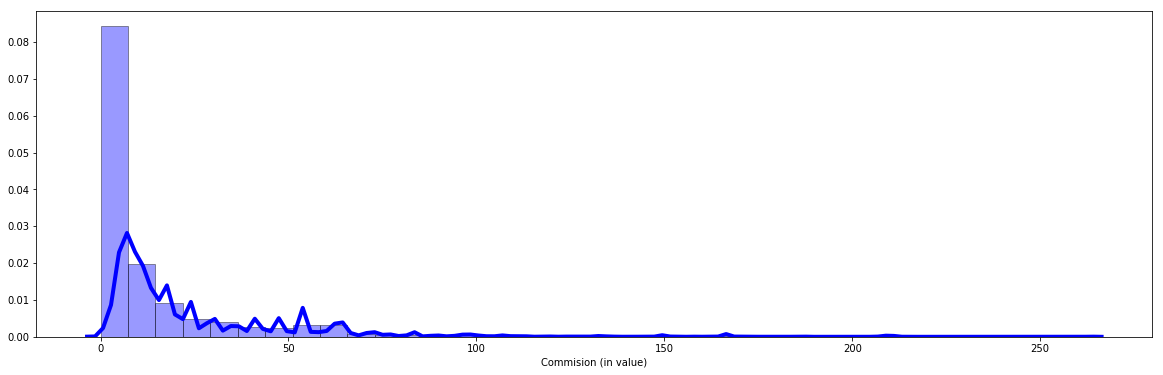

In [42]:
dplot = distplot(data,'Commision (in value)')

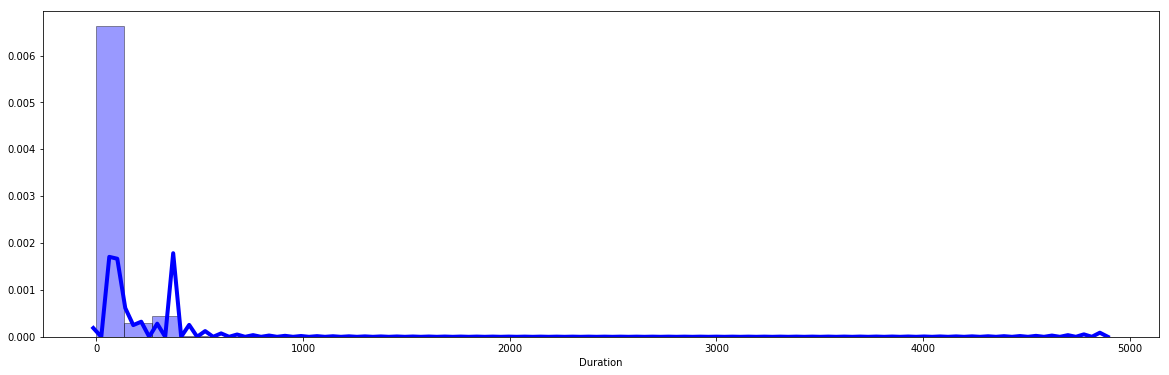

In [43]:
duration_plot = distplot(data,'Duration')

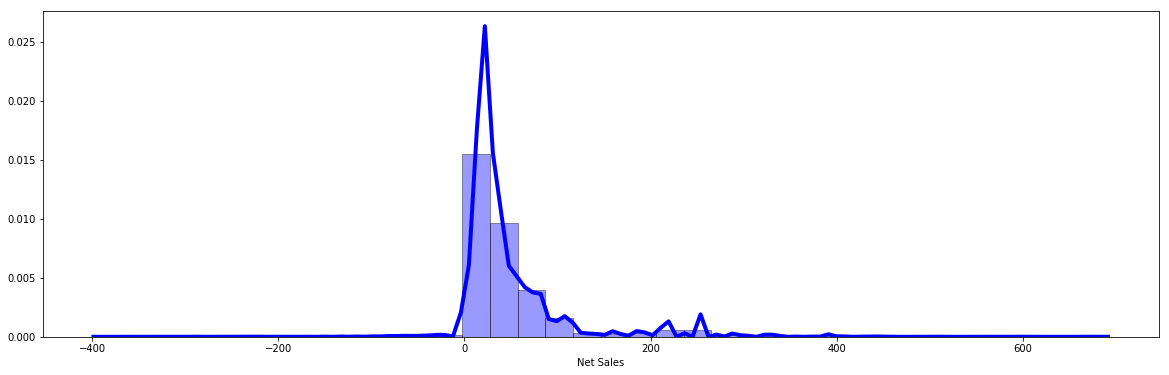

In [44]:

duration_plot = distplot(data,'Net Sales')


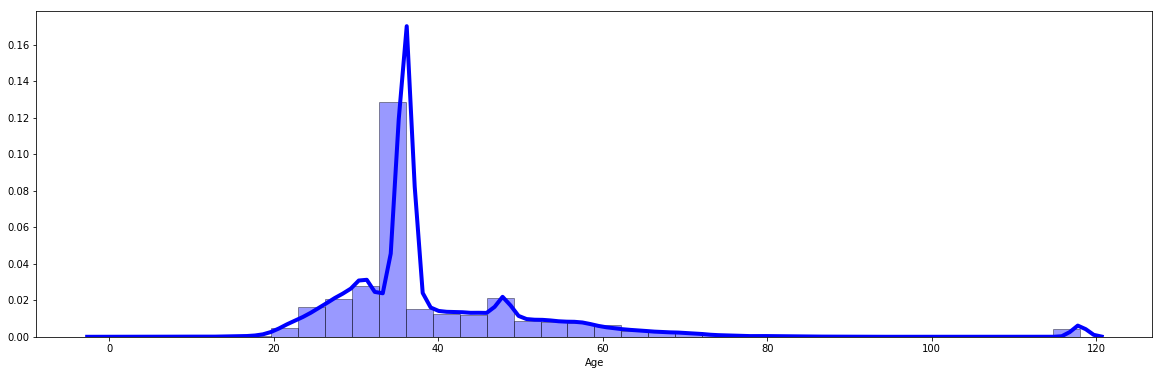

In [45]:
duration_plot = distplot(data,'Age')

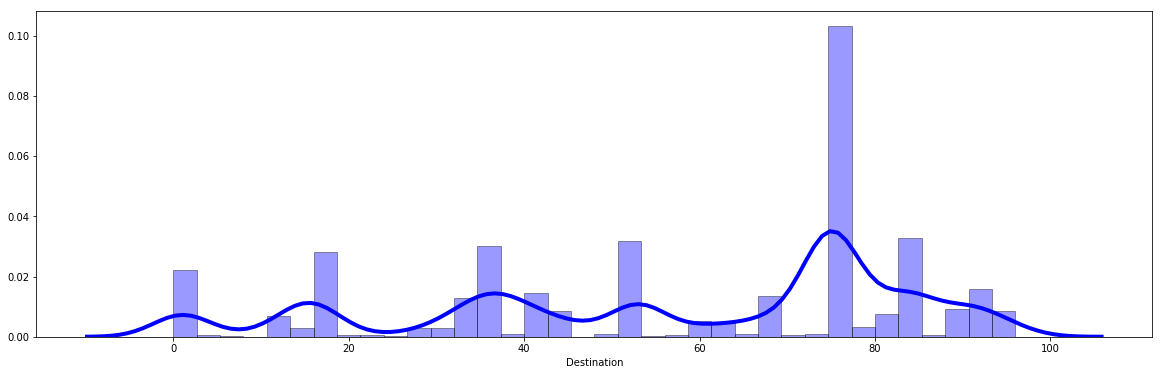

In [55]:
duration_plot = distplot(data,'Destination')

In [70]:
# data[['Commision (in value)','Net Sales','Duration','Age']].plot.kde(figsize=(16,6))
# plt.xlim((-400,600))

In [46]:
def stripplot(data,column):
    sns.stripplot(data[column], jitter=0.25,linewidth=.5, color='red')
#     sns.despine(right=True) 
    return stripplot

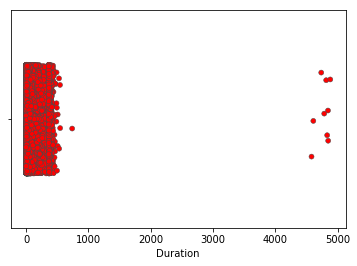

In [47]:
strip_duration = stripplot(data,'Duration')

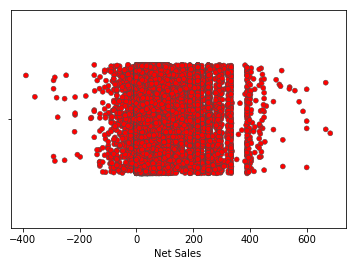

In [48]:
stri_NetSales = stripplot(data, 'Net Sales')

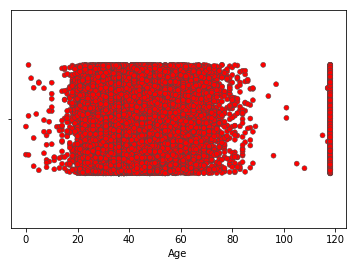

In [49]:
stri_Age = stripplot(data, 'Age')

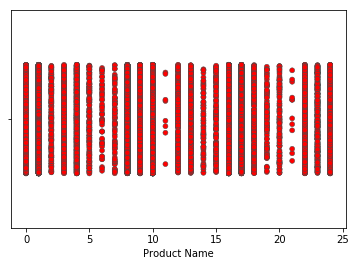

In [50]:
stri_Agency = stripplot(data, 'Product Name')

MULTIVARIATE ANALYSIS

In [51]:
def scatter_plot(dataframe, column1, column2):
    plt.figure(figsize=(13, 6))
    sns.scatterplot(dataframe[column1], dataframe[column2])
    return scatter_plot
    

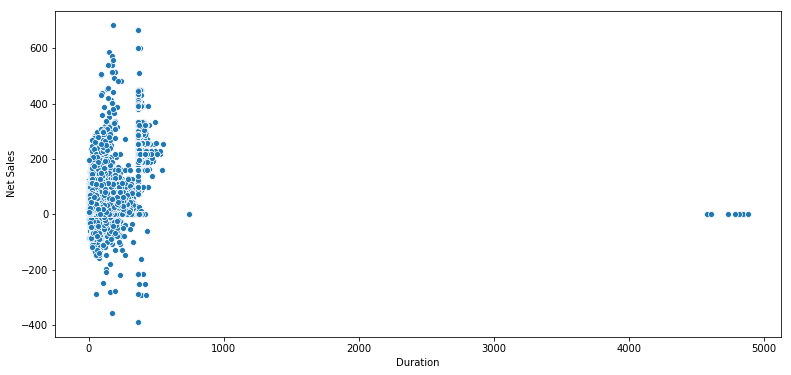

In [52]:
Duration_NetSales = scatter_plot(data, 'Duration','Net Sales')

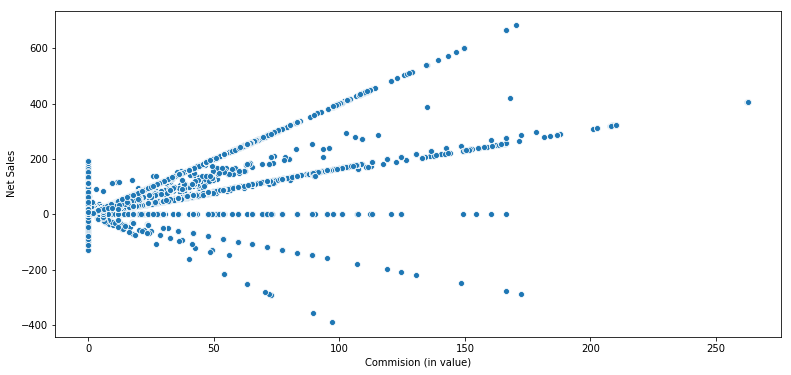

In [53]:
Commisin_NetSales = scatter_plot(data, 'Commision (in value)','Net Sales')

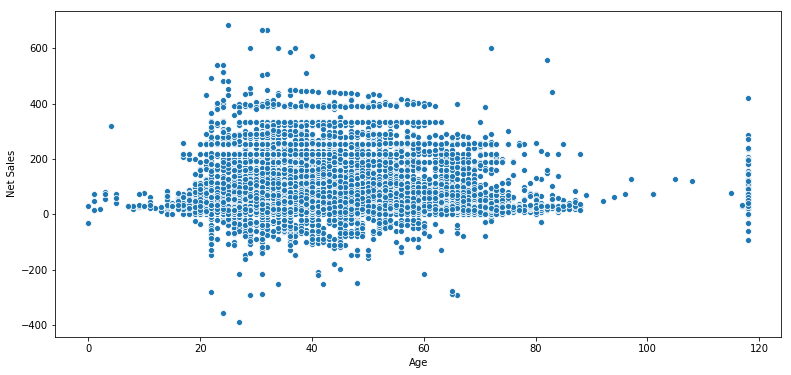

In [54]:
Commisin_NetSales = scatter_plot(data, 'Age','Net Sales')

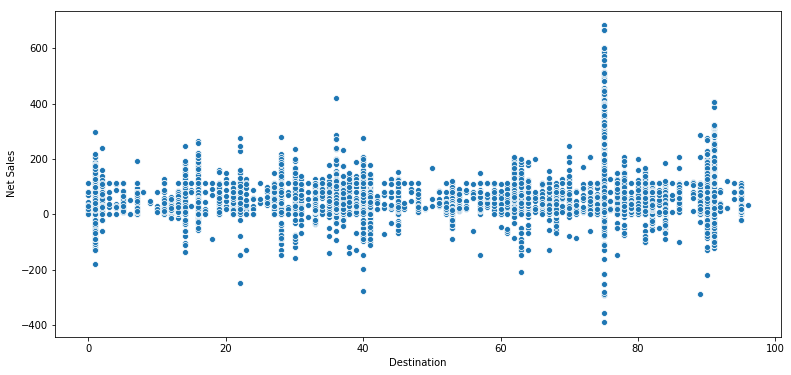

In [55]:
Commisin_NetSales = scatter_plot(data, 'Destination','Net Sales')

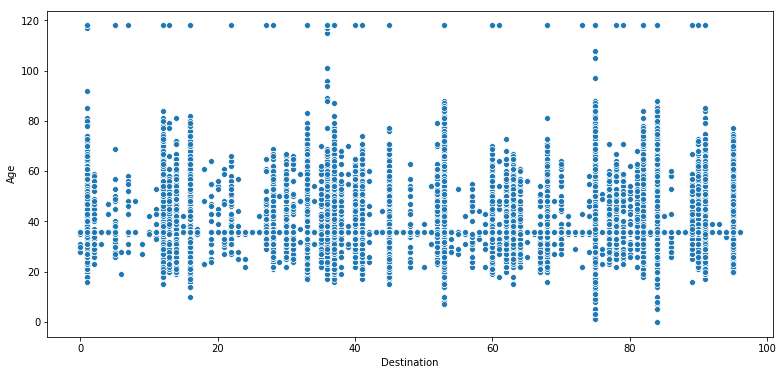

In [56]:
Commisin_NetSales = scatter_plot(data, 'Destination','Age')

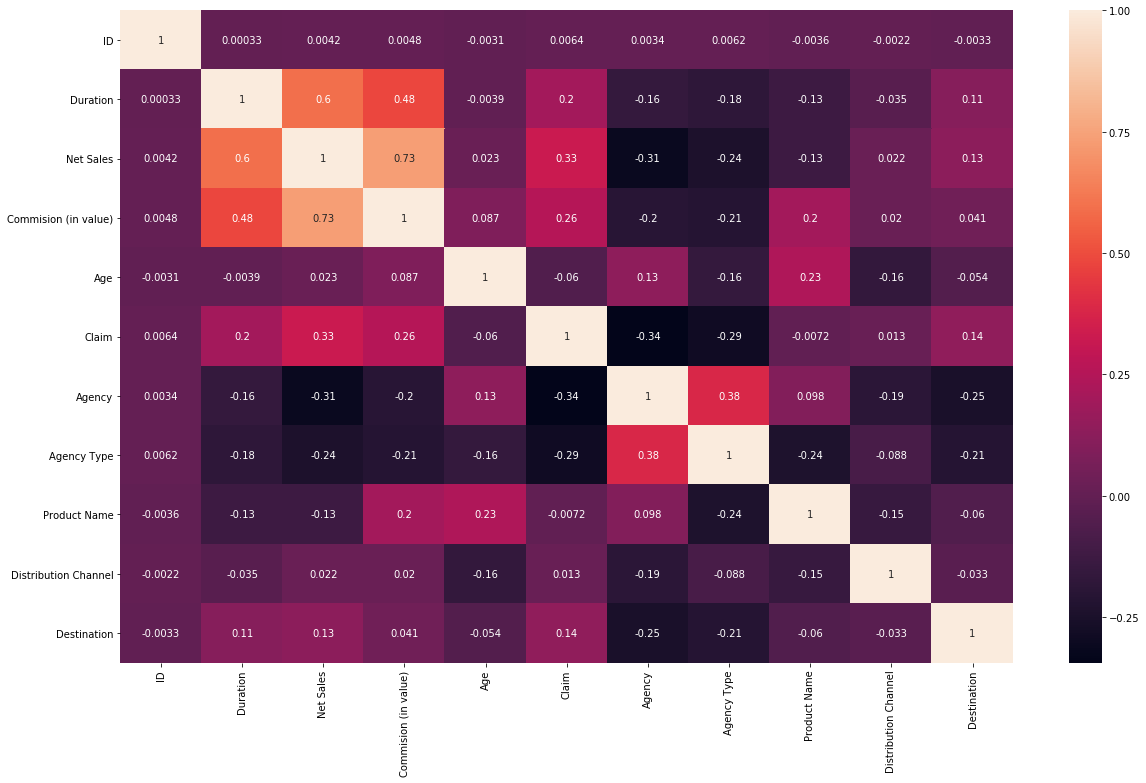

In [57]:
corr = data.corr()
plt.figure(figsize=(20,12))
heatmap = sns.heatmap(corr, annot=True)

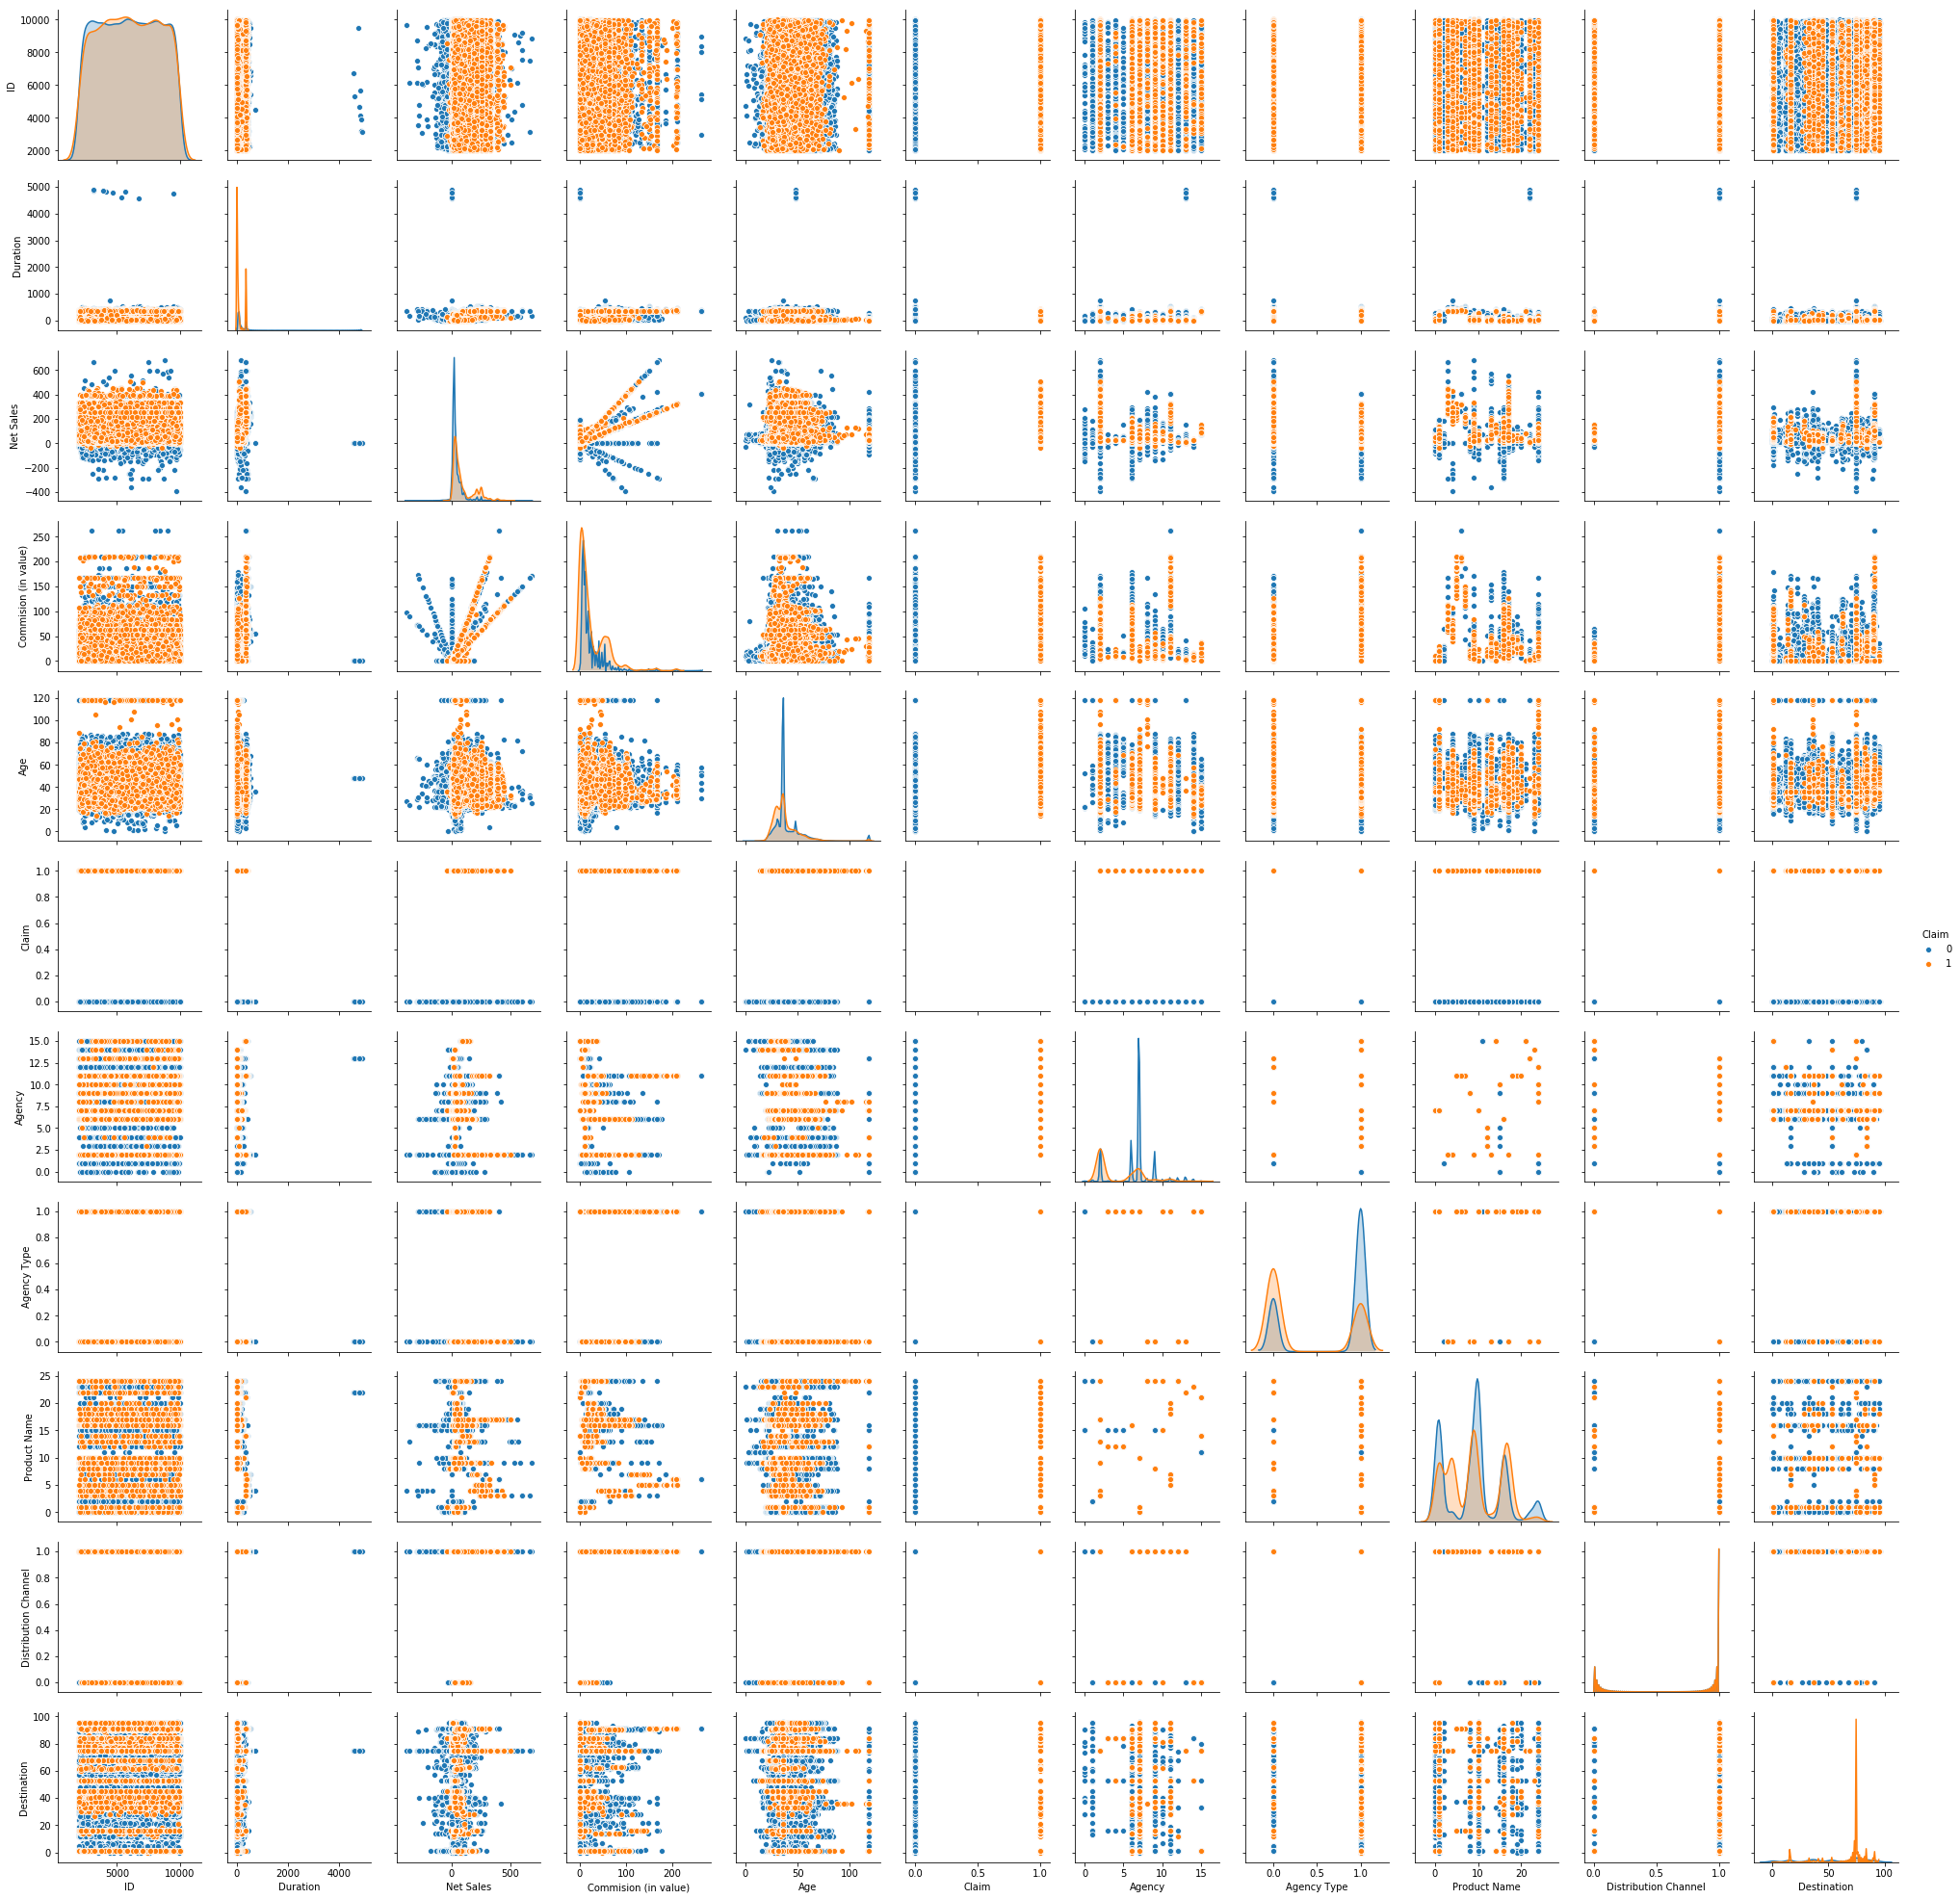

In [58]:
sns.pairplot(data, hue='Claim')

After fitting train data in KNEIGHBOURCLASSIFIER MODEL : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')
KNEIGHBOURCLASSIFIER Accuracy score : 0.87937296883961
prediction on X_test : [0 0 0 ... 0 0 0]
Confusion matrix : [[12187   884]
 [ 1009  1613]]
Classification report :               precision    recall  f1-score   support

           0       0.92      0.93      0.93     13071
           1       0.65      0.62      0.63      2622

   micro avg       0.88      0.88      0.88     15693
   macro avg       0.78      0.77      0.78     15693
weighted avg       0.88      0.88      0.88     15693

Precision Score : 0.6459751702042451
roc curve : (array([0.        , 0.06763063, 1.        ]), array([0.        , 0.61517925, 1.        ]), array([2, 1, 0], dtype=int64))
auc score : 0.7853691404365352
Average precision score : 0.4616867053377913


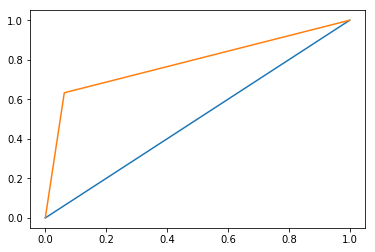

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=25)
fitting = knc.fit(X_train,y_train)
print("After fitting train data in KNEIGHBOURCLASSIFIER MODEL :", fitting)
print("KNEIGHBOURCLASSIFIER Accuracy score :",knc.score(X_test,y_test))
y_pred = knc.predict(X_test)
print("prediction on X_test :",y_pred)
print("Confusion matrix :",confusion_matrix(y_test,y_pred))
print("Classification report :",classification_report(y_test,y_pred))
from sklearn.metrics import precision_score
print("Precision Score :",precision_score(y_test,y_pred))
from sklearn.metrics import roc_curve, auc, roc_auc_score
print("roc curve :",roc_curve(y_test,y_pred))
import matplotlib.pyplot as plt
knc_fpr,knc_tpr,knc_threshold = roc_curve(y_train,knc.predict(X_train))
plt.plot([0,1])
plt.plot(knc_fpr,knc_tpr)
print("auc score :",auc(knc_fpr,knc_tpr))
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print("Average precision score :",average_precision)

## Average precision score gives the area under precision and recall curve

LOGISTIC REGRESSION

After fitting the model : LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
Accuracy score : 0.7954502007264386
Prediction on test data : [0 0 0 ... 0 0 0]
Precision score : 0.4305621162021729
Confusion matrix : [[10660  2411]
 [  799  1823]]
Classification report :               precision    recall  f1-score   support

           0       0.93      0.82      0.87     13071
           1       0.43      0.70      0.53      2622

   micro avg       0.80      0.80      0.80     15693
   macro avg       0.68      0.76      0.70     15693
weighted avg       0.85      0.80      0.81     15693

roc curve : (array([0.        , 0.18445414, 1.        ]), array([0.        , 0.69527079, 1.        ]), array([2, 1, 0], dtype=int64))
auc score : 0.7493684259576195
Average precision score 

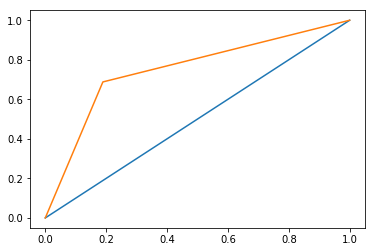

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, class_weight='balanced')
fit = lr.fit(X_train,y_train)
print("After fitting the model :",fit)
print("Accuracy score :",lr.score(X_test,y_test))
lr_y_pred = lr.predict(X_test)
print("Prediction on test data :",lr_y_pred)
print("Precision score :",precision_score(y_test,lr_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,lr_y_pred))
print("Classification report :",classification_report(y_test,lr_y_pred))
print("roc curve :",roc_curve(y_test,lr_y_pred))
lr_fpr,lr_tpr,lr_threshold = roc_curve(y_train,lr.predict(X_train))
plt.plot([0,1])
plt.plot(lr_fpr,lr_tpr)
print("auc score :",auc(lr_fpr,lr_tpr))
average_precision = average_precision_score(y_test, lr_y_pred)
print("Average precision score :",average_precision)



RANDOMIZED LOGISTIC REGRESSION

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'solver': ['saga'], 'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   55.7s finished


After fitting the model : RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'solver': ['saga'], 'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)
Accuracy score : 0.7800293124322947
Prediction on test data : [0 0 0 ... 1 0 0]
Precision score : 0.4087109546854377
Classification report :               precision    recall  f1-score   support

           0       0.93      0.79      0.86     13071
           1       0.41      0.71      0.52      2622

   micro avg       0.78      

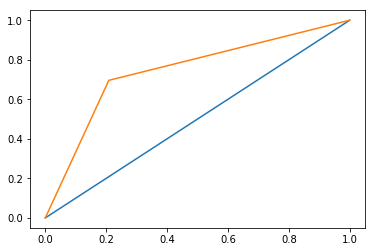

In [77]:
param_grid_lr = {'solver' : ['saga'],                 #solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
                'penalty': ['l1'],
                  'C' : [100, 10, 1.0, 0.1, 0.01]}

rlr = RandomizedSearchCV(estimator = lr, param_distributions = param_grid_lr, cv=5, verbose=1)
print(rlr)
print("After fitting the model :",rlr.fit(X_train,y_train))
print("Accuracy score :",rlr.score(X_test,y_test))
rlr_y_pred = rlr.predict(X_test)
print("Prediction on test data :",rlr_y_pred)
print("Precision score :",precision_score(y_test,rlr_y_pred))
print("Classification report :",classification_report(y_test,rlr_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,rlr_y_pred))
print("Best parameters for logistic regression according to Randomized search cv :",rlr.best_params_)
print("roc curve :",roc_curve(y_test,rlr_y_pred))
import matplotlib.pyplot as plt
rlr_fpr,rlr_tpr,rlr_threshold = roc_curve(y_train,rlr.predict(X_train))
plt.plot([0,1])
plt.plot(rlr_fpr,rlr_tpr)
print("auc score :",auc(rlr_fpr,rlr_tpr))
average_precision = average_precision_score(y_test, rlr_y_pred)
print("Average precision score :",average_precision)


RANDOMIZED DECISION TREE

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight={0: 0.2000275298813921, 1: 4.999311847688955},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 130], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08], 'max_features': ['sqrt', 'log2', 'auto']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
After fitting the model : RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight={0: 0.2000275298813921, 1: 4.999311847688955

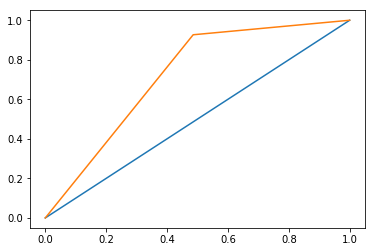

In [84]:
param_grid_dt = {'max_depth': [1,2,3,4,5,6,130],
                'min_samples_leaf': [0.02,0.04, 0.06, 0.08],
                 'max_features' : ['sqrt','log2','auto']
                }

rdt = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid_dt, cv=5)
print(rdt)
print("After fitting the model :",rdt.fit(X_train,y_train))
print("Accuracy score :",rdt.score(X_test,y_test))

rdt_y_pred  = rdt.predict(X_test)
print("Prediction on test data :",rdt_y_pred)

print("Precision score :",precision_score(y_test,rdt_y_pred))
average_precision = average_precision_score(y_test, rdt_y_pred)
print("Average precision score :",average_precision)

print("Classification report :",classification_report(y_test,rdt_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,rdt_y_pred))

print("roc curve :",roc_curve(y_test,rdt_y_pred))
rdt_fpr,rdt_tpr,rdt_threshold = roc_curve(y_train,rdt.predict(X_train))
plt.plot([0,1])
plt.plot(rdt_fpr,rdt_tpr)
train_auc = auc(rdt_fpr,rdt_tpr)
print("train auc score :",train_auc)
print("Best parameters for decision tree according to Randomized search cv :", rdt.best_params_)

DECISION TREE

After fitting the model : DecisionTreeClassifier(class_weight={0: 0.2000275298813921, 1: 4.999311847688955},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')
Accuracy score : 0.9230867265659848
Prediction on test data : [0 0 0 ... 0 0 0]
Precision score : 0.6459751702042451
Classification report :               precision    recall  f1-score   support

           0       0.95      0.95      0.95     13071
           1       0.77      0.77      0.77      2622

   micro avg       0.92      0.92      0.92     15693
   macro avg       0.86      0.86      0.86     15693
weighted avg       0.92      0.92      0.92     15693

Confusion matrix : [[12470   601]
 [  606  2016]]
roc curve : (array([0.        , 0.04597965, 1.        ]), array([0. 

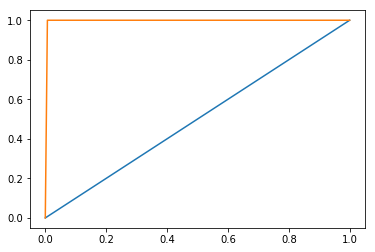

In [83]:
# class_weights = dict{4.998853,0.200045}
dtc = DecisionTreeClassifier(random_state=1,class_weight={0:0.2000275298813921,1:4.999311847688955})
print("After fitting the model :",dtc.fit(X_train,y_train))
print("Accuracy score :",dtc.score(X_test,y_test))
y_pred_dtc = dtc.predict(X_test)
print("Prediction on test data :",y_pred_dtc)
print("Precision score :",precision_score(y_test,y_pred))
print("Classification report :",classification_report(y_test,y_pred_dtc))
print("Confusion matrix :",confusion_matrix(y_test,y_pred_dtc))

print("roc curve :",roc_curve(y_test,y_pred_dtc))
dtc_fpr,dtc_tpr,dtc_threshold = roc_curve(y_train,dtc.predict(X_train))
plt.plot([0,1])
plt.plot(dtc_fpr,dtc_tpr)
print("auc score :",auc(dtc_fpr,dtc_tpr))
average_precision = average_precision_score(y_test, y_pred_dtc)
print("Average precision score :",average_precision)


In [80]:
data.Claim.value_counts()

0    43589
1     8719
Name: Claim, dtype: int64

In [82]:
class_weight_0 = 43589/8719
class_weight_1 = 8719/43589
print(class_weight_0,class_weight_1)

4.999311847688955 0.2000275298813921


RANDOM FOREST CLASSIFIER

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
After fitting the model : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Accuracy score : 0.9339195819792264
Prediction on test data : [0 0 0 ... 0 0 0]
Precision score : 0.8432221741013426
Average precision score : 0.6

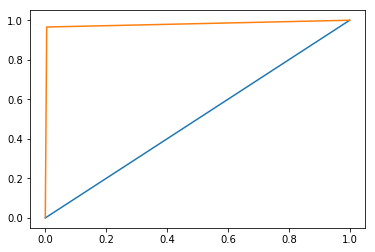

In [89]:
rfc = RandomForestClassifier(random_state=1, criterion='entropy', bootstrap=True)
print(rfc)
print("After fitting the model :",rfc.fit(X_train,y_train))
print("Accuracy score :",rfc.score(X_test,y_test))
rfc_y_pred = rfc.predict(X_test)
print("Prediction on test data :",rfc_y_pred)
print("Precision score :",precision_score(y_test,rfc_y_pred))
average_precision = average_precision_score(y_test, rfc_y_pred)
print("Average precision score :",average_precision)

print("Classification report :",classification_report(y_test,rfc_y_pred))
print("Confusion Matrix :",confusion_matrix(y_test,rfc_y_pred))
print("roc_auc_score :",roc_auc_score(y_test,rfc_y_pred))
print("roc curve :",roc_curve(y_test,rfc_y_pred))
rfc_fpr,rfc_tpr,rfc_threshold = roc_curve(y_train,rfc.predict(X_train))
plt.plot([0,1])
plt.plot(rfc_fpr,rfc_tpr)
print("auc score :",auc(rfc_fpr,rfc_tpr))

In [87]:
print(roc_auc_score(y_test,rfc_y_pred))
print(auc(rfc_fpr,rfc_tpr))

0.8574340159806667
0.9805695807130499


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 130], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08], 'max_features': ['sqrt', 'log2'], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
After fiiting the train data : RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomF

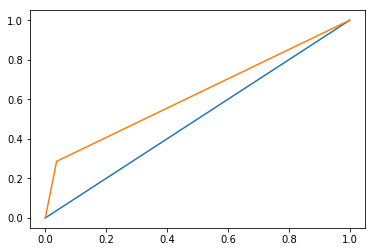

In [90]:
param_grid_rfc = {'max_depth': [1,2,3,4,5,6,130],
                'min_samples_leaf': [0.02,0.04, 0.06, 0.08],
                  'max_features' : ['sqrt', 'log2'],
                  'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200]
                }

rrfc = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid_rfc, cv=5)
print(rrfc)
print("After fiiting the train data :",rrfc.fit(X_train,y_train))
print("Accuracy score :",rrfc.score(X_test,y_test))
print("After predicting on test data :",rrfc.predict(X_test))
print("Precision score :",precision_score(y_test,rrfc.predict(X_test)))
average_precision = average_precision_score(y_test, rrfc.predict(X_test))
print("Average precision score :",average_precision)

print("Classification report :",classification_report(y_test,rrfc.predict(X_test)))
print("Confusion matrix :",confusion_matrix(y_test,rrfc.predict(X_test)))

print("roc curve :",roc_curve(y_test,rrfc.predict(X_test)))
rr_fpr,rr_tpr,rr_threshold = roc_curve(y_train,rrfc.predict(X_train))
plt.plot([0,1])
plt.plot(rr_fpr,rr_tpr)
train_auc = auc(rr_fpr,rr_tpr)
print("train auc :",train_auc)
print('BEST PARAMETERS: ', rrfc.best_params_)

In [91]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [92]:
print(X.columns)
# print(grid_search.feature_importances_)

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency',
       'Product Name', 'Destination'],
      dtype='object')


In [93]:
sensitivity = (12711/(12711+628))        #True Positive Rate (tpr)
specificity = (1994/(1994+360))         # False Positive Rate (fpr)
print('sensitivity(tpr) = ',sensitivity)                 # If correctly identifying positives is important for us, then we should choose a model 
print('specificity(fpr) = ',specificity)                # with higher Sensitivity. However, if correctly identifying negatives is more important, 
                                                  #then we should choose specificity as the measurement metric.

sensitivity(tpr) =  0.9529200089961766
specificity(fpr) =  0.8470688190314358


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.2min finished


After fitting the data: VotingClassifier(estimators=[('rlr', RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
 ...e, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=False, n_jobs=None, voting='soft',
         weights={0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6})
Accuracy score : 0.9077295609507424
After predicting the test data : [0 0 0 ... 0 0 0]
Precision score : 0.7296557120500783
Average precision score : 0.5672342170410363
Classification report :               precision    recall  f1-score   support

           0       0.94      0.95      0.94     13071
           1       0.73      0.71      0.72      2622

   micro avg       0.91      0.91      0.91     15693
   macro avg       0.84   

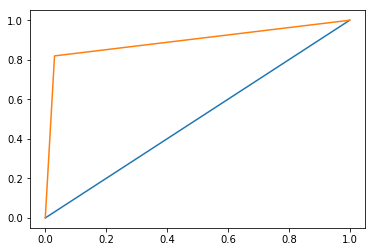

In [94]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('rlr', rlr),('rdt',rdt), ('dtc', dtc), ('rfc',rfc), ('rrfc',rrfc),('lr',lr)],voting='soft', weights={0:1,1:2,2:3,3:4,4:5,5:6}, flatten_transform=False)
print("After fitting the data:",model.fit(X_train,y_train))
print("Accuracy score :",model.score(X_test,y_test))
model_y_pred = model.predict(X_test)
print("After predicting the test data :",model_y_pred)
print("Precision score :",precision_score(y_test,model_y_pred))
average_precision = average_precision_score(y_test, model_y_pred)
print("Average precision score :",average_precision)

print("Classification report :",classification_report(y_test,model_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,model_y_pred))


print("ROC curve :",roc_curve(y_test,model_y_pred))
import matplotlib.pyplot as plt
model_fpr,model_tpr,model_threshold = roc_curve(y_train,model.predict(X_train))
plt.plot([0,1])
plt.plot(model_fpr,model_tpr)
print("train AUC :",auc(model_fpr,model_tpr))

In [96]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

ADABOOST ON RANDOM FOREST CLASSIFIER

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=150, random_state=1)
after fitting the data to model : AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=

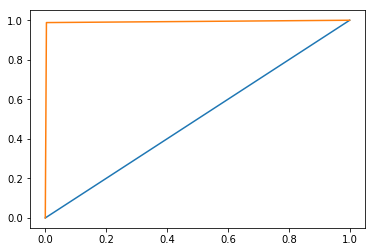

In [97]:
model1 = AdaBoostClassifier(base_estimator=rfc, random_state=1, n_estimators=150, learning_rate=0.5)
print(model1)
print("after fitting the data to model :",model1.fit(X_train,y_train))
print("Accuracy score :",model1.score(X_test,y_test))
model1_y_pred = model1.predict(X_test)
print("After predicting on test data :",model1_y_pred)
print("Precision score :",precision_score(y_test,model1_y_pred))
average_precision = average_precision_score(y_test, model1_y_pred)
print("Average precision score :",average_precision)

print("Classification report :",classification_report(y_test,model1_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,model1_y_pred))


print("roc curve :",roc_curve(y_test,model1_y_pred))
model1_fpr,model1_tpr,model1_threshold = roc_curve(y_train,model1.predict(X_train))
plt.plot([0,1])
plt.plot(model1_fpr,model1_tpr)
print("tran auc :",auc(model1_fpr,model1_tpr))


ADABOOST WITH DECISION TREE CLASSIFIER

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight={0: 0.2000275298813921, 1: 4.999311847688955},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
          learning_rate=0.7, n_estimators=500, random_state=1)
after fitting the model : AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight={0: 0.2000275298813921, 1: 4.999311847688955},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
   

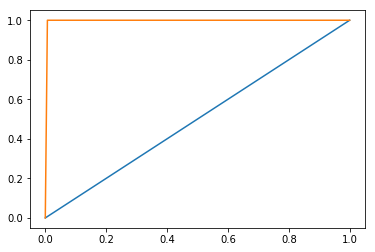

In [98]:
model2 = AdaBoostClassifier(base_estimator=dtc, random_state=1, n_estimators=500, learning_rate=0.7)
print(model2)
print("after fitting the model :",model2.fit(X_train,y_train))
print("accuracy score :",model2.score(X_test,y_test))
model2_y_pred = model2.predict(X_test)
print("after predicting the test data :",model2_y_pred)
print("Precision score :",precision_score(y_test,model2_y_pred))
average_precision = average_precision_score(y_test, model1_y_pred)
print("Average precision score :",average_precision)

print("Classification report :",classification_report(y_test,model2_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,model2_y_pred))

print("ROC curve :",roc_curve(y_test,model2_y_pred))
import matplotlib.pyplot as plt
model2_fpr,model2_tpr,model2_threshold = roc_curve(y_train,model2.predict(X_train))
plt.plot([0,1])
plt.plot(model2_fpr,model2_tpr)
print("train auc :",auc(model2_fpr,model2_tpr))


RANDOMIZED SEARCH CV ADABOOST (base estimator=decision tree classifier)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 130], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08], 'max_features': ['sqrt', 'log2'], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
After fitting the data : RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=AdaBoostClass

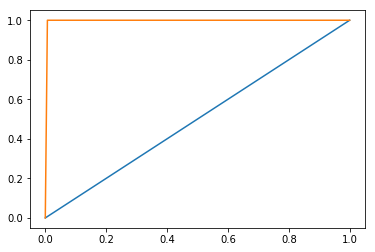

In [99]:
param_grid_rfc = {'n_estimators': [10,50,100,140,150,200,250,300,350,354,400,450,500,550],
                  'learning_rate': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
                 }

model2_r = RandomizedSearchCV(estimator = model2, param_distributions = param_grid_rfc, cv=5)
print(rrfc)
print("After fitting the data :",model2_r.fit(X_train,y_train))
print("Accuracy score :",model2_r.score(X_test,y_test))
print("Predicting on test data :",model2_r.predict(X_test))
print("precision score :",precision_score(y_test,model2_r.predict(X_test)))
average_precision = average_precision_score(y_test, model2_r.predict(X_test))
print("Average precision score :",average_precision)


print("Classification report :",classification_report(y_test,model2_r.predict(X_test)))
print("Confusion matrix :",confusion_matrix(y_test,model2_r.predict(X_test)))

print("roc curve :",roc_curve(y_test,model2_r.predict(X_test)))
import matplotlib.pyplot as plt
model2_r_fpr,model2_r_tpr,model2_r_threshold = roc_curve(y_train,model2_r.predict(X_train))
plt.plot([0,1])
plt.plot(model2_r_fpr,model2_r_tpr)
print("train auc :",auc(model2_r_fpr,model2_r_tpr))
print("Best parameters for AdaBoost Classifier according to Randomized search cv :",model2_r.best_params_)

BAGGING CLASSIFIER WITH DECISION TREE CLASSIFIER

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


After fitting the data : BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2000275298813921, 1: 4.999311847688955},
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=None, oob_score=False,
         random_state=1, verbose=True, warm_start=False)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score : 0.9388899509335372


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Predicting on test data : [0 0 0 ... 0 0 0]
Precision score : 0.8373225152129817
Average precision score : 0.6946852759557474
Classification report :               precision    recall  f1-score   support

           0       0.96      0.97      0.96     13071
           1       0.84      0.79      0.81      2622

   micro avg       0.94      0.94      0.94     15693
   macro avg       0.90      0.88      0.89     15693
weighted avg       0.94      0.94      0.94     15693

Confusion matrix : [[12670   401]
 [  558  2064]]
ROC curve : (array([0.       , 0.0306786, 1.       ]), array([0.        , 0.78718535, 1.        ]), array([2, 1, 0], dtype=int64))


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


Train AUC : 0.996543137062158


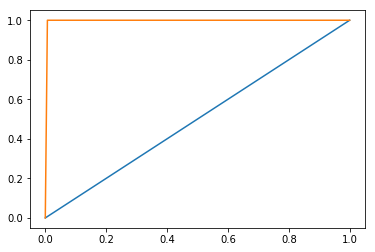

In [100]:
model3 = BaggingClassifier(base_estimator=dtc, random_state=1, n_estimators=150, verbose=True)
print("After fitting the data :",model3.fit(X_train,y_train))
print("Accuracy score :",model3.score(X_test,y_test))
model3_y_pred = model3.predict(X_test)
print("Predicting on test data :",model3_y_pred)
print("Precision score :",precision_score(y_test,model3_y_pred))
average_precision = average_precision_score(y_test, model3_y_pred)
print("Average precision score :",average_precision)


print("Classification report :",classification_report(y_test,model3_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,model3_y_pred))

print("ROC curve :",roc_curve(y_test,model3_y_pred))
model3_fpr,model3_tpr,model3_threshold = roc_curve(y_train,model3.predict(X_train))
plt.plot([0,1])
plt.plot(model3_fpr,model3_tpr)
print("Train AUC :",auc(model3_fpr,model3_tpr))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


After fitting the data : BaggingClassifier(base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
       ...tate=1, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=150, random_state=1),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=1, verbose=True, warm_start=False)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy score : 0.9385713375390301


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min finished


After predicting on test data : [0 0 0 ... 0 0 0]
Precision score : 0.8462823725981621
Average precision score : 0.6918948443460236
Classification report :               precision    recall  f1-score   support

           0       0.96      0.97      0.96     13071
           1       0.85      0.77      0.81      2622

   micro avg       0.94      0.94      0.94     15693
   macro avg       0.90      0.87      0.89     15693
weighted avg       0.94      0.94      0.94     15693

Confusion matrix : [[12703   368]
 [  596  2026]]
ROC curve : (array([0.        , 0.02815393, 1.        ]), array([0.       , 0.7726926, 1.       ]), array([2, 1, 0], dtype=int64))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.7min finished


train AUC : 0.9857846701501007


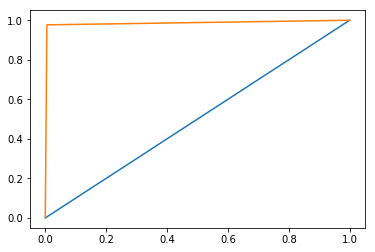

In [101]:
model3_1 = BaggingClassifier(base_estimator=model1, random_state=1, n_estimators=10, verbose=True)
print("After fitting the data :",model3_1.fit(X_train,y_train))
print("Accuracy score :",model3_1.score(X_test,y_test))
model3_1_y_pred = model3_1.predict(X_test)
print("After predicting on test data :",model3_1_y_pred)
print("Precision score :",precision_score(y_test,model3_1_y_pred))
average_precision = average_precision_score(y_test, model3_1_y_pred)
print("Average precision score :",average_precision)


print("Classification report :",classification_report(y_test,model3_1_y_pred))
print("Confusion matrix :",confusion_matrix(y_test,model3_1_y_pred))

print("ROC curve :",roc_curve(y_test,model3_1_y_pred))
model3_1_fpr,model3_1_tpr,model3_1_threshold = roc_curve(y_train,model3_1.predict(X_train))
plt.plot([0,1])
plt.plot(model3_1_fpr,model3_1_tpr)
print("train AUC :",auc(model3_1_fpr,model3_1_tpr))


after fitting the data : RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'loss': ['deviance', 'exponential'], 'n_estimators': [100, 150, 200]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
Accuracy score : 0.925826801758746
after predicting on test data : [0 0 0 ... 0 0 0]
Precision score : 0.8237122557726465
Average precision 

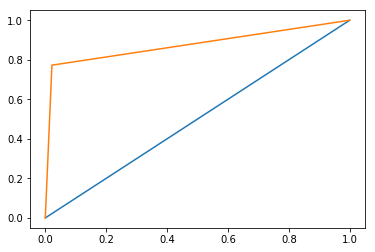

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
params_grid_gb = { 'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                   'loss' : ['deviance','exponential'],
                   'n_estimators' : [100,150,200]
                 }
random_gb = RandomizedSearchCV(estimator = gb, param_distributions = params_grid_gb, cv=5)
print("after fitting the data :",random_gb.fit(X_train,y_train))
print("Accuracy score :",random_gb.score(X_test,y_test))
random_gb_y_pred = random_gb.predict(X_test)
print("after predicting on test data :",random_gb_y_pred)
print("Precision score :",precision_score(y_test,random_gb_y_pred))
average_precision = average_precision_score(y_test, random_gb_y_pred)
print("Average precision score :",average_precision)

print(classification_report(y_test,random_gb_y_pred))
print(confusion_matrix(y_test,random_gb_y_pred))

print("ROC curve :",roc_curve(y_test,random_gb_y_pred))
random_gb_fpr,random_gb_tpr,random_gb_threshold = roc_curve(y_train,random_gb.predict(X_train))
plt.plot([0,1])
plt.plot(random_gb_fpr,random_gb_tpr)
print(auc(random_gb_fpr,random_gb_tpr))


In [104]:
print("Best parameters for gradient boosting according to Randomized search cv :",random_gb.best_params_)

Best parameters for gradient boosting according to Randomized search cv : {'n_estimators': 200, 'loss': 'deviance', 'learning_rate': 0.7}


TEST DATASET

In [105]:
test_data = pd.read_csv('test_hack.csv')
test_data.drop(['Agency Type','Distribution Channel'],1,inplace=True)

In [106]:
test_data.head()

,ID,Agency,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [107]:
test_categorical_col = test_data[['Agency','Product Name','Destination']]
test_categorical_col.head()
test_numerical_col = test_data[['Duration','Net Sales','Commision (in value)','Age']]
test_numerical_col.head()

,Duration,Net Sales,Commision (in value),Age
0,192,18.0,0.00,36
1,2,20.0,0.00,36
2,13,13.5,3.38,24
3,133,41.0,0.00,36
4,2,30.0,7.50,32


In [108]:
le_test_categorical_col = test_categorical_col.apply(le.fit_transform)
test_data = test_data.drop(['Agency','Destination','Product Name'],1)

In [109]:
# test_data = test_data.join(le_test_categorical_col)
# 
test_data.drop(['ID'],1,inplace=True)


In [110]:
test_data.head()
test_data = test_data.join(le_test_categorical_col)

In [111]:
test_data.shape
test_data.head()

,Duration,Net Sales,Commision (in value),Age,Agency,Product Name,Destination
0,192,18.0,0.00,36,7,10,33
1,2,20.0,0.00,36,7,0,75
2,13,13.5,3.38,24,2,9,75
3,133,41.0,0.00,36,7,1,82
4,2,30.0,7.50,32,2,17,75


In [112]:
scale_test = pd.DataFrame(sc.transform(test_data))

In [113]:
scale_test.head()

,0,1,2,3,4,5,6
0,1.233163,-0.508776,-0.538190,-0.258093,0.273575,0.115905,-0.875781
1,-0.517147,-0.475446,-0.538190,-0.258093,0.273575,-1.427237,0.672915
2,-0.415813,-0.583767,-0.389952,-1.127630,-1.629447,-0.038409,0.672915
3,0.689646,-0.125487,-0.538190,-0.258093,0.273575,-1.272923,0.931031
4,-0.517147,-0.308799,-0.209260,-0.547939,-1.629447,1.196105,0.672915


In [114]:
test_y_pred = random_gb.predict(scale_test)
test_y_pred.shape

(22421,)

TEST AUC FOR RANDOMIZED RANDOM FOREST CLASSIFIER

0.6284732197519375


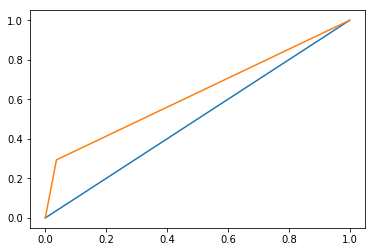

In [115]:
rr_test_fpr,rr_test_tpr,rr_test_threshold = roc_curve(y_test,rrfc.predict(X_test))
test_auc = auc(rr_test_fpr,rr_test_tpr)
print(test_auc)
plt.plot([0,1])
plt.plot(rr_test_fpr,rr_test_tpr)

TEST AUC FOR RANDOMIZED DECISION TREE CLASSIFIER

0.7224277826417838


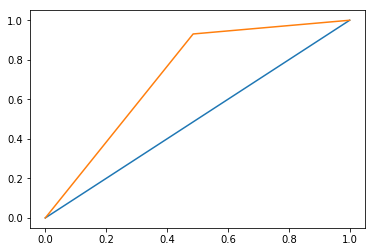

In [116]:
rdt_test_fpr,rdt_test_tpr,rdt_test_threshold = roc_curve(y_test,rdt.predict(X_test))
test_auc = auc(rdt_test_fpr,rdt_test_tpr)
print(test_auc)
plt.plot([0,1])
plt.plot(rdt_test_fpr,rdt_test_tpr)

TEST AUC FOR RANDOMIZED LOGISTIC REGRESSION

0.7514866438831609


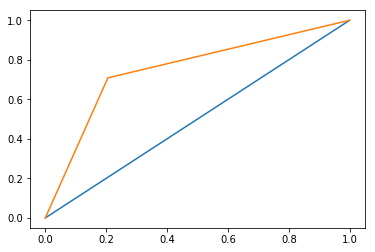

In [117]:
rlr_test_fpr,rlr_test_tpr,rlr_test_threshold = roc_curve(y_test,rlr.predict(X_test))
print(auc(rlr_test_fpr,rlr_test_tpr))
plt.plot([0,1])
plt.plot(rlr_test_fpr,rlr_test_tpr)

TEST AUC FOR RANDOM FOREST CLASSIFIER

0.8574340159806667


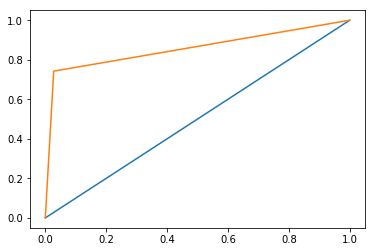

In [118]:
# predictProb = rfc.predict_proba(test_data)
# predictProbs = predictProb[:,0]
test_fpr,test_tpr,test_threshold = roc_curve(y_test,rfc.predict(X_test))
print(auc(test_fpr,test_tpr))
plt.plot([0,1])
plt.plot(test_fpr,test_tpr)

TEST AUC FOR DECISION TREE CLASSIFIER

0.8614495344647356


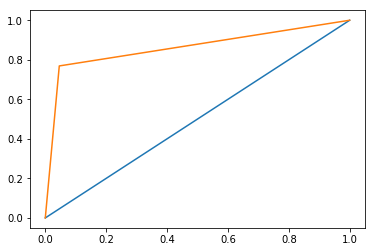

In [119]:
test_dtc_fpr,test_dtc_tpr,test_dtc_threshold = roc_curve(y_test,dtc.predict(X_test))
print(auc(test_dtc_fpr,test_dtc_tpr))
plt.plot([0,1])
plt.plot(test_dtc_fpr,test_dtc_tpr)

TEST AUC FOR VOTING CLASSIFIER

0.8292119855175756


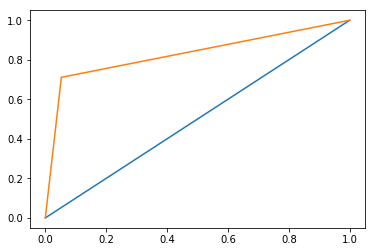

In [120]:

model_test_fpr,model_test_tpr,model_test_threshold = roc_curve(y_test,model.predict(X_test))
plt.plot([0,1])
plt.plot(model_test_fpr,model_test_tpr)
print(auc(model_test_fpr,model_test_tpr))

TEST AUC FOR ADABOOST ON RANDOM FOREST CLASSIFIER

0.878255652503043


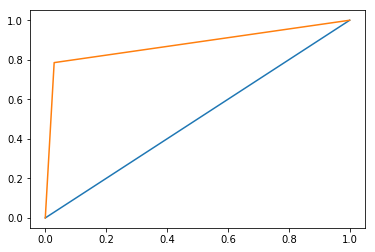

In [123]:
model1_test_fpr,model1_test_tpr,model1_test_threshold = roc_curve(y_test,model1.predict(X_test))
plt.plot([0,1])
plt.plot(model1_test_fpr,model1_test_tpr)
print(auc(model1_test_fpr,model1_test_tpr))

TEST AUC FOR ADABOOST ON DECISION TREE CLASSIFIER

0.8619210833562237


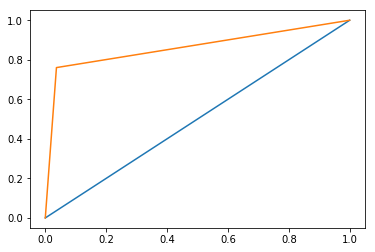

In [124]:
model2_test_fpr,model2_test_tpr,model2_test_threshold = roc_curve(y_test,model2.predict(X_test))
plt.plot([0,1])
plt.plot(model2_test_fpr,model2_test_tpr)
print(auc(model2_test_fpr,model2_test_tpr))

TEST AUC FOR RANDOMIZED ADABOOST DECISION TREE CLASSIFIER

0.8622693397632748


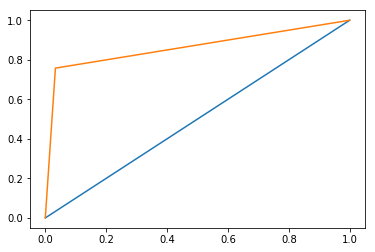

In [125]:
model2_r_test_fpr,model2_r_test_tpr,model2_r_test_threshold = roc_curve(y_test,model2_r.predict(X_test))
plt.plot([0,1])
plt.plot(model2_r_test_fpr,model2_r_test_tpr)
print(auc(model2_r_test_fpr,model2_r_test_tpr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


0.8782533766034369


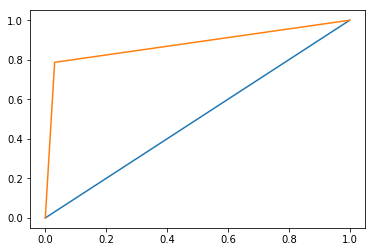

In [126]:
model3_test_fpr,model3_test_tpr,model3_test_threshold = roc_curve(y_test,model3.predict(X_test))
plt.plot([0,1])
plt.plot(model3_test_fpr,model3_test_tpr)
print(auc(model3_test_fpr,model3_test_tpr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished


0.872269336261891


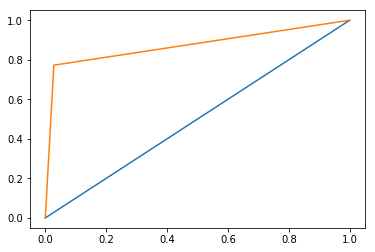

In [127]:
model3_1_test_fpr,model3_1_test_tpr,model3_1_test_threshold = roc_curve(y_test,model3_1.predict(X_test))
plt.plot([0,1])
plt.plot(model3_1_test_fpr,model3_1_test_tpr)
print(auc(model3_1_test_fpr,model3_1_test_tpr))

0.8385513146208867


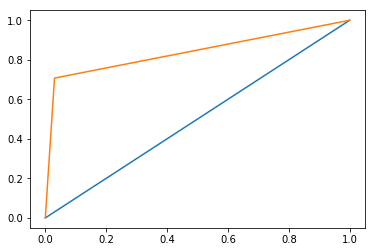

In [122]:
random_gb_test_fpr,random_gb_test_tpr,random_gb_test_threshold = roc_curve(y_test,random_gb.predict(X_test))
plt.plot([0,1])
plt.plot(random_gb_test_fpr,random_gb_test_tpr)
print(auc(random_gb_test_fpr,random_gb_test_tpr))

TEST AUC FOR KNN

0.7737743098903419


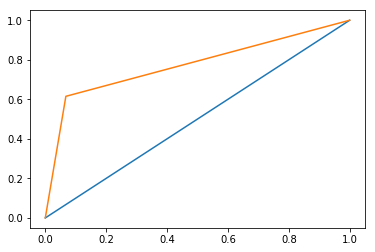

In [128]:
knc_test_fpr,knc_test_tpr,knc_test_threshold = roc_curve(y_test,knc.predict(X_test))
plt.plot([0,1])
plt.plot(knc_test_fpr,knc_test_tpr)
print(auc(knc_test_fpr,knc_test_tpr))

In [129]:
submission = pd.read_csv('sample_submission_hack.csv')


In [130]:
submission.Claim = test_y_pred

In [131]:
submission.shape

(22421, 2)

In [132]:
submission.to_csv("D:\sample_submissioin.csv",index=False)

In [133]:
submission.Claim.value_counts()

0    20360
1     2061
Name: Claim, dtype: int64

In [ ]:
#Our model has a precision of 0.5—in other words, when it predicts a tumor is malignant, it is correct 50% of the time.

